In [1]:
#Import modules
%matplotlib inline
# %pip install seaborn
import tweepy as tp
from tweepy import Cursor
#handling data
import pandas as pd
import numpy as np
from scipy import stats
import time
from operator import itemgetter

#import twitter credentials
# from twitter_credentials import *

#handling information
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

In [2]:
# Establish TwitterConnection Creds
api_key="UJ4IDf8TDkwxl7ooMeZLOGxaY"
api_key_secret="EXG1e6MlQ7mGPv86cRBllGv38QeCC4B91pYqxnKmK4Xg777LCt"
access_token="258202282-7LQJcDTcGDL4rjVKviQLpHAgjXMqHYl6wQnSgDpN"
access_token_secret="F0YXJLpX0iELDZ692ExHvcARrvpJpXYfV6TYj3ssUVjRF"
auth = tp.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

# api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
# client = tp.Client("AAAAAAAAAAAAAAAAAAAAAIxYfgEAAAAA7d%2F8V8UqVprw17NlDSwUVKmSqbo%3DPzDdenF34bjXu3KR36M0sEUjNPffgvTuUsT5s4cQjerqwHrF4E",wait_on_rate_limit=True)
client = tp.Client("AAAAAAAAAAAAAAAAAAAAAIxYfgEAAAAA7d%2F8V8UqVprw17NlDSwUVKmSqbo%3DPzDdenF34bjXu3KR36M0sEUjNPffgvTuUsT5s4cQjerqwHrF4E")


In [6]:
tweet = tp.Cursor(api.user_timeline, screen_name='@elonmusk').items()

tweets_list=[]
while True:
    try:
        tw = next(tweet)
        tweets_list.append(tw)
        if len(tweets_list)>10000:
            break;
    except tp.TooManyRequests:
        print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
        time.sleep(62*15)
    except StopIteration:
        break

In [19]:


columns = ['contributors',
           'coordinates', 
           'created_at',
           'entities',
           'favorite_count',
           'favorited',
           'geo', 
           'id', 
           'id_str',
           'in_reply_to_screen_name',
           'in_reply_to_status_id',
           'in_reply_to_status_id_str',
           'in_reply_to_user_id',
           'in_reply_to_user_id_str', 
           'is_quote_status', 
           'lang',
           'place',
           'retweet_count', 
           'retweeted',
           'source',
           'text', 
           'truncated', 
           'user']

data = []
for tweet in tweets_list:
    data.append([
                tweet.contributors,
                tweet.coordinates, 
                tweet.created_at,
                tweet.entities,
                tweet.favorite_count,
                tweet.favorited,
                tweet.geo, 
                tweet.id, 
                tweet.id_str,
                tweet.in_reply_to_screen_name,
                tweet.in_reply_to_status_id,
                tweet.in_reply_to_status_id_str,
                tweet.in_reply_to_user_id,
                tweet.in_reply_to_user_id_str, 
                tweet.is_quote_status, 
                tweet.lang,
                tweet.place,
                tweet.retweet_count, 
                tweet.retweeted,
                tweet.source,
                tweet.text, 

                tweet.truncated, 
                tweet.user] )
tweets_df = pd.DataFrame(data, columns=columns)
tweets_df.to_csv("newTweets.csv")

In [20]:
tweets_final = pd.DataFrame(columns = ["created_at", "id", "in_reply_to_screen_name", "in_reply_to_status_id", 
                                       "in_reply_to_user_id",
                                      "retweeted_id", "retweeted_screen_name", "user_mentions_screen_name", 
                                       "user_mentions_id", 
                                       "text", "user_id", "screen_name", "followers_count"])

In [25]:
# Columns that are going to be the same
equal_columns = ["created_at", "id", "text"]
tweets_final[equal_columns] = tweets_df[equal_columns]

In [38]:
def get_basics(tweets_final):
    tweets_final["screen_name"] = tweets_df["user"].apply(lambda x: x.screen_name)
    tweets_final["user_id"] = tweets_df["user"].apply(lambda x: x.id)
    tweets_final["followers_count"] = tweets_df["user"].apply(lambda x: x.followers_count)
    return tweets_final

In [39]:

def get_usermentions(tweets_final):
    tweets_final["user_mentions_screen_name"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["screen_name"] if x["user_mentions"] else np.nan)
    tweets_final["user_mentions_id"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["id_str"] if x["user_mentions"] else np.nan)
    return tweets_final

In [44]:
def get_retweets(tweets_final):
    # Inside the tag 'retweeted_status' will find 'user' and will get 'screen name' and 'id'    
    tweets_final["retweeted_screen_name"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else np.nan)
    tweets_final["retweeted_id"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["id_str"] if x is not np.nan else np.nan)
    return tweets_final

In [45]:
def get_in_reply(tweets_final):
    # Just copy the 'in_reply' columns to the new dataframe
    tweets_final["in_reply_to_screen_name"] = tweets_df["in_reply_to_screen_name"]
    tweets_final["in_reply_to_status_id"] = tweets_df["in_reply_to_status_id"]
    tweets_final["in_reply_to_user_id"]= tweets_df["in_reply_to_user_id"]
    return tweets_final

In [57]:
def fill_df(tweets_final):
    get_basics(tweets_final)
    get_usermentions(tweets_final)
    get_in_reply(tweets_final)
    return tweets_final

In [58]:
tweets_final = fill_df(tweets_final)

In [59]:
tweets_final

,created_at,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,retweeted_id,retweeted_screen_name,user_mentions_screen_name,user_mentions_id,text,user_id,screen_name,followers_count
0,2022-10-17 07:01:46+00:00,1581903277347999744,elonmusk,1.581902e+18,4.419640e+07,NaN,NaN,NaN,NaN,"Ok, we will add a donate option to Starlink",44196397,elonmusk,109004127
1,2022-10-17 07:00:46+00:00,1581903026348261377,pirate3Guy,1.581903e+18,2.948888e+09,NaN,NaN,pirate3Guy,2948888068,@pirate3Guy @HSerunjogi That’s oddly low. Norm...,44196397,elonmusk,109004127
2,2022-10-17 06:55:10+00:00,1581901615552155648,None,NaN,NaN,NaN,NaN,NaN,NaN,Are there others that want to donate Starlinks...,44196397,elonmusk,109004127
3,2022-10-17 05:54:03+00:00,1581886234896797696,HSerunjogi,1.581747e+18,2.324763e+09,NaN,NaN,HSerunjogi,2324763302,@HSerunjogi Ok,44196397,elonmusk,109004127
4,2022-10-17 05:52:27+00:00,1581885835926196224,DogecoinNorway,1.581885e+18,1.376474e+18,NaN,NaN,DogecoinNorway,1376473924842758147,@DogecoinNorway @moxie @ID_AA_Carmack 🤣 that’s...,44196397,elonmusk,109004127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2021-12-30 07:09:22+00:00,1476450321786359810,heydave7,1.341622e+18,2.989344e+07,NaN,NaN,heydave7,29893444,@heydave7 🤔,44196397,elonmusk,109000673
3196,2021-12-30 06:27:15+00:00,1476439722046238725,None,NaN,NaN,NaN,NaN,NaN,NaN,https://t.co/OCUqr6xd9d,44196397,elonmusk,109000673
3197,2021-12-30 06:18:38+00:00,1476437555717541893,None,NaN,NaN,NaN,NaN,NaN,NaN,https://t.co/mVhCpxVPZI,44196397,elonmusk,109000673
3198,2021-12-29 17:21:54+00:00,1476242084126511105,PPathole,1.476033e+18,1.291945e+09,NaN,NaN,PPathole,1291945442,@PPathole I do,44196397,elonmusk,109000673


In [49]:

# # keywords = keywords + ' -filter:retweets' # using filter to remove retweets

# limit=10000
# # limit 50000
# tweets = tp.Cursor(api.search_tweets,
#                        q=keywords,
#                        tweet_mode='extended',
#                        lang='en', # using filter to tweets not in english
#                        result_type="recent").items(limit)


In [50]:
# tweets

In [51]:
# keywords = 'from:elonmusk' 
# limit=10000
# tweet = tp.Cursor(api.search_tweets,
#                        q=keywords,
#                        tweet_mode='extended',
#                        lang='en', # using filter to tweets not in english
#                        ).items(limit)


# tweets_list1=[]
# while True:
#     try:
#         tw = next(tweet)
#         tweets_list1.append(tw)
#         if len(tweets_list1)>10000:
#             break;
#     except tp.TooManyRequests:
#         print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
#         time.sleep(62*15)
#     except StopIteration:
#         break

In [61]:
tweets_final = tweets_final.where((pd.notnull(tweets_final)), None)

In [62]:
tweets_final

,created_at,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,retweeted_id,retweeted_screen_name,user_mentions_screen_name,user_mentions_id,text,user_id,screen_name,followers_count
0,2022-10-17 07:01:46+00:00,1581903277347999744,elonmusk,1.5819e+18,4.41964e+07,None,None,None,None,"Ok, we will add a donate option to Starlink",44196397,elonmusk,109004127
1,2022-10-17 07:00:46+00:00,1581903026348261377,pirate3Guy,1.5819e+18,2.94889e+09,None,None,pirate3Guy,2948888068,@pirate3Guy @HSerunjogi That’s oddly low. Norm...,44196397,elonmusk,109004127
2,2022-10-17 06:55:10+00:00,1581901615552155648,None,None,None,None,None,None,None,Are there others that want to donate Starlinks...,44196397,elonmusk,109004127
3,2022-10-17 05:54:03+00:00,1581886234896797696,HSerunjogi,1.58175e+18,2.32476e+09,None,None,HSerunjogi,2324763302,@HSerunjogi Ok,44196397,elonmusk,109004127
4,2022-10-17 05:52:27+00:00,1581885835926196224,DogecoinNorway,1.58189e+18,1.37647e+18,None,None,DogecoinNorway,1376473924842758147,@DogecoinNorway @moxie @ID_AA_Carmack 🤣 that’s...,44196397,elonmusk,109004127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2021-12-30 07:09:22+00:00,1476450321786359810,heydave7,1.34162e+18,2.98934e+07,None,None,heydave7,29893444,@heydave7 🤔,44196397,elonmusk,109000673
3196,2021-12-30 06:27:15+00:00,1476439722046238725,None,None,None,None,None,None,None,https://t.co/OCUqr6xd9d,44196397,elonmusk,109000673
3197,2021-12-30 06:18:38+00:00,1476437555717541893,None,None,None,None,None,None,None,https://t.co/mVhCpxVPZI,44196397,elonmusk,109000673
3198,2021-12-29 17:21:54+00:00,1476242084126511105,PPathole,1.47603e+18,1.29195e+09,None,None,PPathole,1291945442,@PPathole I do,44196397,elonmusk,109000673


In [63]:
edlist = pd.read_csv('')
graph = nx.Graph()

In [66]:
for index, tweet in tweets_final.iterrows():
    user, interactions = get_interactions(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    for interaction in interactions:
        int_id, int_name = interaction
        graph.add_edge(user_id, int_id, tweet_id=tweet_id)
        

        graph.nodes[user_id]["name"] = user_name
        graph.nodes[int_id]["name"] = int_name     

In [67]:
print(f"There are {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges present in the Graph")

There are 1504 nodes and 1503 edges present in the Graph


In [68]:
degrees = [val for (node, val) in graph.degree()]

In [69]:
print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")  

The maximum degree of the Graph is 1503
The minimum degree of the Graph is 1


In [70]:
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}") 

The average degree of the nodes in the Graph is 2.0
The most frequent degree of the nodes found in the Graph is 1


/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_49876/1540769242.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")


In [71]:
if nx.is_connected(graph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [72]:
print(f"There are {nx.number_connected_components(graph)} connected components in the Graph")  

There are 1 connected components in the Graph


In [95]:
# largest_subgraph = max(nx.subgraph(graph) for c in nx.connected_components(graph))

largest_subgraph = max(list(graph.subgraph(c) for c in nx.connected_components(graph)))

# largest_subgraph = max(G.subgraph(c) for c in connected_components(G))

In [97]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [98]:
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \
edges present in the largest component of the Graph")

There are 1504 nodes and 1503 edges present in the largest component of the Graph


In [99]:
print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

The average clustering coefficient is 0.0 in the largest subgraph
The transitivity of the largest subgraph is 0


In [100]:
print(f"The diameter of our Graph is {nx.diameter(largest_subgraph)}")
print(f"The average distance between any two nodes is {nx.average_shortest_path_length(largest_subgraph):.2f}")

The diameter of our Graph is 2
The average distance between any two nodes is 2.00


In [107]:
graph_centrality = nx.degree_centrality(largest_subgraph)

In [118]:
max_de = max(graph_centrality.items(), key=itemgetter(1))

In [111]:
graph_closeness = nx.closeness_centrality(largest_subgraph)

In [120]:
max_clo = max(graph_closeness.items(), key=itemgetter(1))

In [113]:
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)


In [116]:
from operator import itemgetter
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

In [121]:
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")

the node with id 44196397 has a degree centrality of 1.00 which is the maximum of the Graph
the node with id 44196397 has a closeness centrality of 1.00 which is the maximum of the Graph
the node with id 44196397 has a betweenness centrality of 1.00 which is the maximum of the Graph


In [135]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['orange','red']
central_nodes = ['44196397','44196397']

In [136]:
pos = nx.spring_layout(largest_subgraph, k=0.05)

In [ ]:
# #Create network layout for visualizations
# G_fb = nx.read_edgelist("complete_network.csv", create_using = nx.Graph(), nodetype = int)

Data = open('EdgeList3.csv', "r")
next(Data, None)  
dgraph = nx.parse_edgelist(Data, delimiter=',', create_using=nx.Graph(),
                      nodetype=int)

In [ ]:
print (nx.info(dgraph))

In [8]:
# spring_pos = nx.spring_layout(dgraph)

In [9]:
# plt.figure(figsize=(10,7))
# plt.axis("off")
# nx.draw_networkx(dgraph, pos = spring_pos, with_labels = False, node_size = 35)

In [199]:
# print (nx.info(egoGraph))

DiGraph with 1122 nodes and 1121 edges


/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_49876/3550477526.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print (nx.info(egoGraph))


In [201]:
# spring_pos = nx.spring_layout(dgraph)

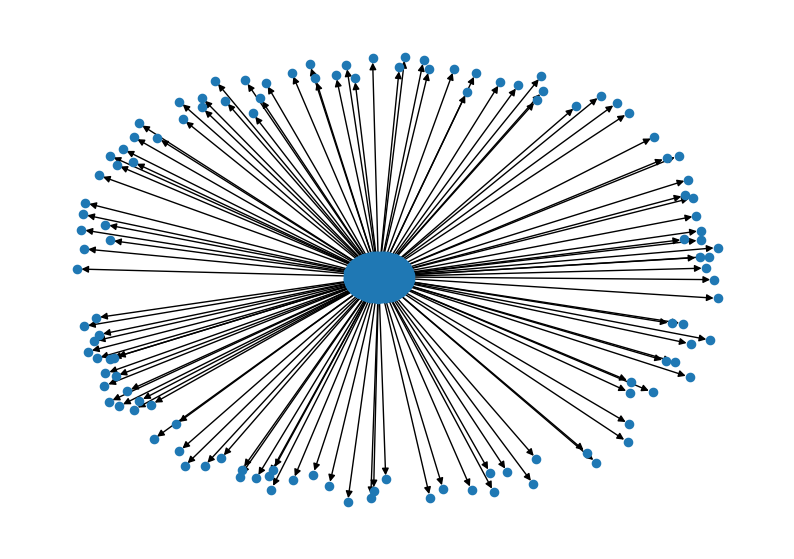

In [202]:
# plt.figure(figsize=(10,7))
# plt.axis("off")
# nx.draw_networkx(dgraph, pos = spring_pos, with_labels = False, node_size = 35)

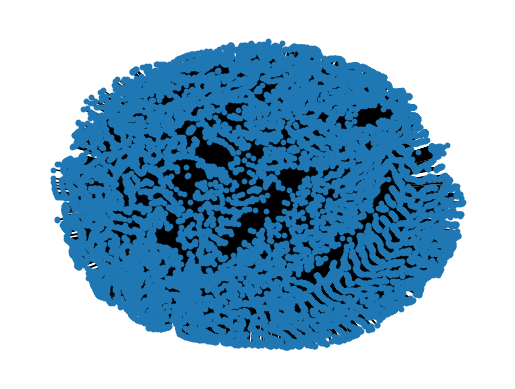

In [213]:

# import matplotlib.pyplot as plt
# from matplotlib.patches import ArrowStyle

# # TODO: for you to complete!
# # use networkx to draw
# nx.draw_networkx(dgraph, arrows=True, with_labels=False, node_size = 10,
#                  pos=nx.spring_layout(dgraph, scale=100)
#                 )
# plt.axis('off')
# plt.show()


In [215]:
# idwd= [1,2,2,2,2,2,2,2.3,3,3,3,3.4]

In [237]:
# %pip install community
# import community as comm

%pip uninstall community
# %pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/community-1.0.0b1.dist-info/*
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/community/*
  Would not remove (might be manually added):
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/community/community_louvain.py
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/community/community_status.py
Proceed (y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [6]:
import community.community_louvain

parts = community.best_partition(dgraph)
values = [parts.get(node) for node in dgraph.nodes()]

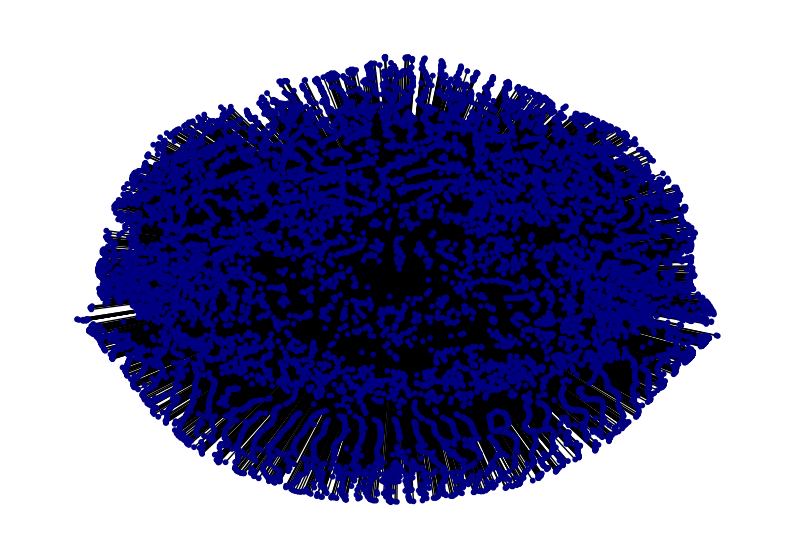

In [7]:
plt.figure(figsize=(10,7))
plt.axis("off")
nx.draw_networkx(dgraph, 
                 pos = nx.spring_layout(dgraph, scale=100),
                 cmap = plt.get_cmap("jet"), 
                 node_color = values, node_size = 10, with_labels = False)




In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman


Data = open('EdgeList3.csv', "r")
next(Data, None)  
# G = nx.karate_club_graph()
dgraph = nx.parse_edgelist(Data, delimiter=',', create_using=nx.karate_club_graph(),
                      nodetype=int)

In [9]:
node_groups=[]

communities = girvan_newman(dgraph)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))


KeyboardInterrupt



In [5]:
# G=nx.path_graph(4)
nx.write_gexf(dgraph, "test.gexf")

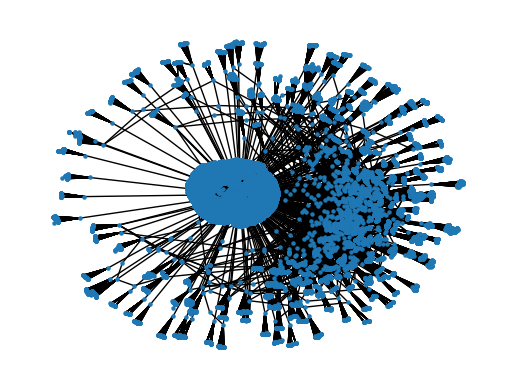

In [7]:
# # use networkx to draw
nx.draw_networkx(dgraph, arrows=False, with_labels=False, node_size = 5,
                 pos=nx.spring_layout(dgraph, scale=100)
                )
plt.axis('off')
plt.show()